# Support mismatch plotter

Generate plots of the data produced and saved by `Support_mismatch.ipynb`.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Choose model
model = 'M1'
#model = 'M20'
#model = 'VdV'
#model = 'Szederkenyi'

In [3]:
SAVE_DIR = f"{model}_supmis"

filename_25  = "npts-025.npz"
filename_50  = "npts-050.npz"
filename_75  = "npts-075.npz"
filename_100 = "npts-0100.npz"

# Full path to the files
file_path_25 = os.path.join(SAVE_DIR, filename_25)
file_path_50 = os.path.join(SAVE_DIR, filename_50)
file_path_75 = os.path.join(SAVE_DIR, filename_75)
file_path_100 = os.path.join(SAVE_DIR, filename_100)

# Load the .npz file
hists_25 = np.load(file_path_25)
hists_50 = np.load(file_path_50)
hists_75 = np.load(file_path_75)
hists_100 = np.load(file_path_100)

# Read the 25 npts data from the file
Cdif_hist_25 = hists_25['Cdif_hist_f']
Cint_hist_25 = hists_25['Cint_hist_f']
Kdif_hist_25 = hists_25['Kdif_hist_f']
Kint_hist_25 = hists_25['Kint_hist_f']

histograms_25 = [Cint_hist_25, Kint_hist_25, Cdif_hist_25, Kdif_hist_25]

# Read the 50 npts data from the file
Cdif_hist_50 = hists_50['Cdif_hist_f']
Cint_hist_50 = hists_50['Cint_hist_f']
Kdif_hist_50 = hists_50['Kdif_hist_f']
Kint_hist_50 = hists_50['Kint_hist_f']

histograms_50 = [Cint_hist_50, Kint_hist_50, Cdif_hist_50, Kdif_hist_50]

# Read the 75 npts data from the file
Cdif_hist_75 = hists_75['Cdif_hist_f']
Cint_hist_75 = hists_75['Cint_hist_f']
Kdif_hist_75 = hists_75['Kdif_hist_f']
Kint_hist_75 = hists_75['Kint_hist_f']

histograms_75 = [Cint_hist_75, Kint_hist_75, Cdif_hist_75, Kdif_hist_75]

# Read the 100 npts data from the file
Cdif_hist_100 = hists_100['Cdif_hist_f']
Cint_hist_100 = hists_100['Cint_hist_f']
Kdif_hist_100 = hists_100['Kdif_hist_f']
Kint_hist_100 = hists_100['Kint_hist_f']

histograms_100 = [Cint_hist_100, Kint_hist_100, Cdif_hist_100, Kdif_hist_100]

In [4]:
NPTS = [25, 50, 75, 100]
histogram_Cint = [Cint_hist_25, Cint_hist_50, Cint_hist_75, Cint_hist_100]
histogram_Cdif = [Cdif_hist_25, Cdif_hist_50, Cdif_hist_75, Cdif_hist_100]

histogram_Kint = [Kint_hist_25, Kint_hist_50, Kint_hist_75, Kint_hist_100]
histogram_Kdif = [Kdif_hist_25, Kdif_hist_50, Kdif_hist_75, Kdif_hist_100]

In [5]:
# Plot colours Cint, Kint, Cdif, Kdif
colours = ["cadetblue", "darkblue", "lightcoral", "firebrick"]

# Plot bins
max_interest = 10  # Max relevant bin
n_bins = max_interest + 2
bins = np.arange(0, n_bins + 1)
bin_width = bins[1] - bins[0]
bin_centers = 0.5 * (bins[1:] + bins[:-1])

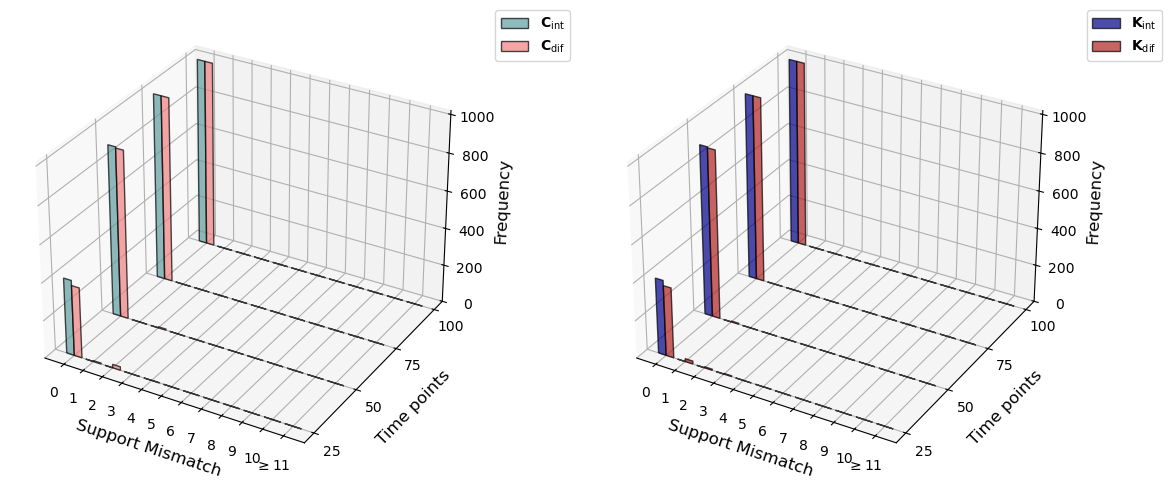

In [6]:
colours = ["cadetblue", "darkblue", "lightcoral", "firebrick"]

# Create figure with 2 subplots side by side
fig = plt.figure(figsize=(14, 6))

group_width = bin_width * 0.8
bar_width   = group_width / 2
offsets     = [-0.5, 0.5]

# === First subplot ===
ax1 = fig.add_subplot(1, 2, 1, projection='3d')

Cint_labels = ['$\\mathbf{C}_\\mathrm{int}$', None, None, None]
Cdif_labels = ['$\\mathbf{C}_\\mathrm{dif}$', None, None, None]

for c, z, Cih, Cdh, Cil, Cdl in zip(colours, NPTS,
                                    histogram_Cint, histogram_Cdif,
                                    Cint_labels, Cdif_labels
                                   ):
    ax1.bar(bin_centers + offsets[0]*bar_width, 
           Cih, 
           zs=z, 
           zdir='y', 
           width=bar_width,
           color=colours[0], 
           edgecolor='black', 
           alpha=0.7, 
           label=Cil)
    
    ax1.bar(bin_centers + offsets[1]*bar_width,
           Cdh, 
           zs=z, 
           zdir='y', 
           width=bar_width,
           color=colours[2],  
           edgecolor='black', 
           alpha=0.7, 
           label=Cdl)

# Formatting
#ax1.set_title("Plot 1", fontsize=13)
# Axis labels
ax1.set_xlabel('Support Mismatch', fontsize=12)
ax1.set_ylabel('Time points', fontsize=12) 
ax1.set_zlabel('Frequency', fontsize=12) 

# Axis limits
ax1.set_xlim(-0.5, len(bin_centers) + 0.5)
ax1.set_zlim(0, 1020)

# Ticks and tick labels on X axis
ax1.set_xticks(bin_centers)
xtick_labels = [str(i) for i in range(max_interest + 1)] + [r"$\geq 11$"]
ax1.set_xticklabels(xtick_labels)

# Ticks and tick labels on Y axis
ax1.set_yticks([25, 50, 75, 100])
ax1.set_yticklabels(['25', '50', '75', '100'])

for label in ax1.get_yticklabels():
    label.set_horizontalalignment('center')
    label.set_verticalalignment('center')

# Grid and legend
ax1.grid(True, linestyle='--', alpha=0.6)

ax1.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

# === Second subplot ===
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

Kint_labels = ['$\\mathbf{K}_\\mathrm{int}$', None, None, None]
Kdif_labels = ['$\\mathbf{K}_\\mathrm{dif}$', None, None, None]

for c, z, Kih, Kdh, Kil, Kdl in zip(colours, NPTS,
                                    histogram_Kint, histogram_Kdif,
                                    Kint_labels, Kdif_labels
                                   ):

    ax2.bar(bin_centers + offsets[0]*bar_width,
           Kih, 
           zs=z, #+1.5, 
           zdir='y', 
           width=bar_width,
           color=colours[1], 
           edgecolor='black', 
           alpha=0.7, 
           label=Kil)
    
    ax2.bar(bin_centers + offsets[1]*bar_width,
           Kdh, 
           zs=z, #+1.5, 
           zdir='y', 
           width=bar_width,
           color=colours[3],  
           edgecolor='black', 
           alpha=0.7, 
           label=Kdl)


# Formatting
#ax2.set_title("Plot 2", fontsize=13)
# Axis labels
ax2.set_xlabel('Support Mismatch', fontsize=12)
ax2.set_ylabel('Time points', fontsize=12) 
ax2.set_zlabel('Frequency', fontsize=12)  

# Axis limits
ax2.set_xlim(-0.5, len(bin_centers) + 0.5)
ax2.set_zlim(0, 1020)

# Ticks and tick labels on X axis
ax2.set_xticks(bin_centers)
xtick_labels = [str(i) for i in range(max_interest + 1)] + [r"$\geq 11$"]
ax2.set_xticklabels(xtick_labels)

# Ticks and tick labels on Y axis
ax2.set_yticks([25, 50, 75, 100])
ax2.set_yticklabels(['25', '50', '75', '100'])

for label in ax2.get_yticklabels():
    label.set_horizontalalignment('center')
    label.set_verticalalignment('center')

# Grid and legend
ax2.grid(True, linestyle='--', alpha=0.6)

# Legend 
ax2.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

savefig = SAVE_DIR + "_CiCd-KiKd_histogram.pdf"
savefig_path = os.path.join(SAVE_DIR, savefig)
plt.savefig(savefig_path, transparent=False, bbox_inches='tight')